In [203]:
import random
from pprint import pprint

import frigidum
import numpy as np
from frigidum.examples import tsp
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from scipy.spatial import distance

### Subtask 1

In [204]:
eps = 0.001

In [205]:
krange = range(1000)

In [206]:
def f(x):
    return 1 / (x ** 2 - 3 * x + 2)

In [207]:
arr = []
for ki in krange:
    xk = (3 * ki) / 1000
    if f(xk) < -100:
        arr.append(-100 + np.random.normal(0, 1))
    elif -100 <= f(xk) <= 100:
        arr.append(f(xk) + np.random.normal(0, 1))
    else:
        arr.append(100 + np.random.normal(0, 1))

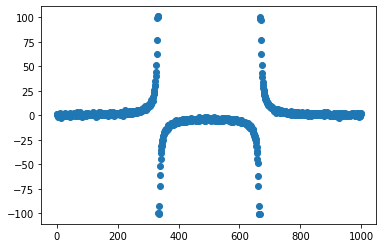

In [208]:
plt.plot(krange, arr, 'o')
plt.show()

In [209]:
def counter(func):
    func_call = 0

    def internal_counter(*x):
        global func_call
        func_call += 1
        return func(*x)

    return internal_counter, func_call

In [210]:
def aproximate_func(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [211]:
def aproximate_func_only_args(a, b, c, d):
    return [aproximate_func((3 * ki) / 1000, a, b, c, d) for ki in krange]

In [212]:
def least_squares_func(a, b, c, d, arr_true):
    return sum((aproximate_func((3 * ki) / 1000, a, b, c, d) - arr_true[ki]) ** 2 for ki in krange)

In [213]:
least_squares_func_for_optimize, func_call = counter(lambda x: least_squares_func(*x, arr))

nelder_mead = minimize(least_squares_func_for_optimize, (0, 0, 0, 0), method="Nelder-Mead", options={"fatol": eps})

nelder_mead_result_x = nelder_mead.x

pprint({
    "result": nelder_mead_result_x,
    "iters": nelder_mead.nit,
    "func_call": func_call,
})

/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_27542/1777896025.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (a * x + b) / (x ** 2 + c * x + d)
/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_27542/1777896025.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * x + b) / (x ** 2 + c * x + d)


{'func_call': 800,
 'iters': 469,
 'result': array([-1.00710405,  1.00760696, -2.00092464,  1.00094089])}


In [214]:
aproximate_func_only_args_for_optimize, func_call = counter(
    lambda x: np.array(aproximate_func_only_args(*x)) - np.array(arr))

lm = optimize.least_squares(aproximate_func_only_args_for_optimize, [1, 1, 1, 1], method='lm')

lm_result_x = lm.x

pprint({
    "result": lm_result_x,
    "iters": lm.nfev,
    "func_call": func_call,
})

{'func_call': 156,
 'iters': 145,
 'result': array([-1.01047229,  1.01095683, -2.0008458 ,  1.00086212])}


In [215]:
least_squares_func_for_optimize, func_call = counter(lambda x: least_squares_func(*x, arr))

da = optimize.dual_annealing(least_squares_func_for_optimize, bounds=[[-10, 10], [-10, 10], [-10, 10], [-10, 10]])

da_result_x = da.x

pprint({
    "result": da_result_x,
    "iters": da.nit,
    "func_call": func_call,
})

{'func_call': 9031,
 'iters': 1000,
 'result': array([-1.00648464,  1.00698751, -2.00092477,  1.00094098])}


In [216]:
least_squares_func_for_optimize, func_call = counter(lambda x: least_squares_func(*x, arr))

de = optimize.differential_evolution(least_squares_func_for_optimize,
                                     bounds=[[-10, 10], [-10, 10], [-10, 10], [-10, 10]])

de_result_x = de.x

pprint({
    "result": de_result_x,
    "iters": de.nit,
    "func_call": func_call,
})

{'func_call': 1240,
 'iters': 7,
 'result': array([-1.00655469,  1.00705751, -2.00092491,  1.00094112])}


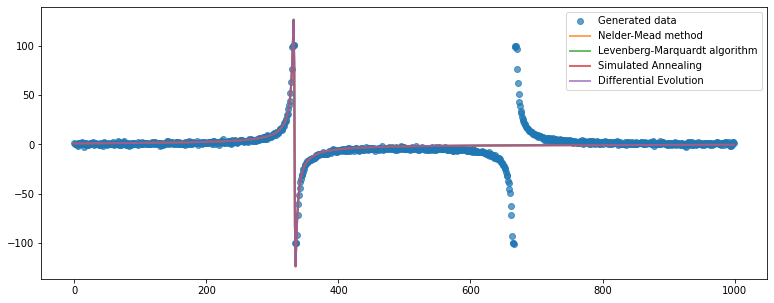

In [217]:
plt.figure(figsize=(13, 5))
plt.plot(krange, arr, 'o', alpha=0.7, label="Generated data")
plt.plot(krange, aproximate_func_only_args(*nelder_mead_result_x), linewidth=2, alpha=0.7, label="Nelder-Mead method")
plt.plot(krange, aproximate_func_only_args(*lm_result_x), linewidth=2, alpha=0.7,
         label="Levenberg-Marquardt algorithm")
plt.plot(krange, aproximate_func_only_args(*da_result_x), linewidth=2, alpha=0.7, label="Simulated Annealing")
plt.plot(krange, aproximate_func_only_args(*de_result_x), linewidth=2, alpha=0.7, label="Differential Evolution")
# plt.ylim(-150, 150)
plt.legend()
plt.show()

### Subtask 2

In [183]:
cities_coords = []
with open("./kn57_xy.txt", "r") as file:
    for line in file:
        cities_coords.append([float(s) for s in line.strip().split(" ") if s != ""])
cities_coords = np.array(cities_coords)

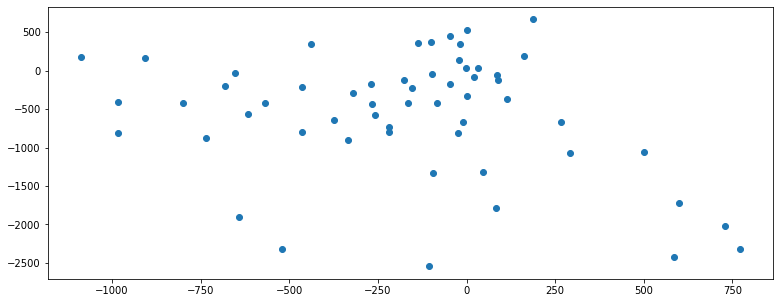

In [194]:
plt.figure(figsize=(13, 5))
plt.plot(cities_coords[:, 0], cities_coords[:, 1], 'o')
plt.show()

In [185]:
distance_matrix = distance.cdist(cities_coords, cities_coords, 'euclidean')

In [186]:
def get_random_path():
    path = list(range(len(cities_coords)))
    random.shuffle(path)
    return np.array(path)

In [187]:
path = get_random_path()

In [188]:
def calculate_path_length(path):
    global distance_matrix
    length = 0
    for i in range(len(path)):
        c1 = path[i]
        if i == len(path) - 1:
            c2 = path[0]
        else:
            c2 = path[i + 1]
        length += distance_matrix[c1, c2]
    return length

In [189]:
def close_loop(path):
    return np.append(path, path[0])

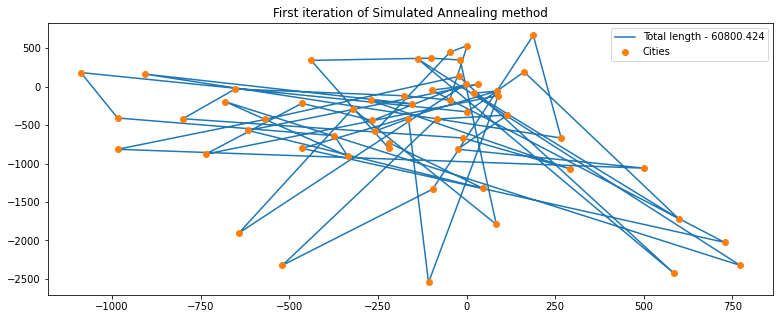

In [201]:
plt.figure(figsize=(13, 5))
plt.plot(cities_coords[close_loop(path), 0], cities_coords[close_loop(path), 1],
         label=f"Total length - {round(calculate_path_length(path), 3)}")
plt.plot(cities_coords[:, 0], cities_coords[:, 1], 'o', label="Cities")
plt.title("First iteration of Simulated Annealing method")
plt.legend()
plt.show()

In [191]:
def swap_for_2opt(route, i, k):
    route_copy = route.copy()
    index_of_cut_left = i
    index_of_cut_right = k
    route_copy[index_of_cut_left:index_of_cut_right] = np.flip(route_copy[index_of_cut_left:index_of_cut_right])

    return route_copy


def local_search_2opt(route):
    steps_since_improved = 0
    still_improving = True

    route = route.copy()

    while still_improving:
        for i in range(route.size - 1):
            for k in np.arange(i + 1, route.size):
                alt_route = swap_for_2opt(route, i, k)

                if calculate_path_length(alt_route) < calculate_path_length(route):
                    route = alt_route.copy()
                    steps_since_improved = 0

            steps_since_improved += 1

            if steps_since_improved > route.size + 1:
                still_improving = False
                break

    return route

In [192]:
optim_path, _ = frigidum.sa(random_start=get_random_path,
                            objective_function=calculate_path_length,
                            neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix,
                                        tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
                            copy_state=frigidum.annealing.naked,
                            T_start=10 ** 5,
                            alpha=.92,
                            T_stop=0.001,
                            repeats=10 ** 2,
                            post_annealing=local_search_2opt)

T: 0.001, M: 0.00, O_min: 28418.8736, O_current: 28418.8736: 100%|██████████| 221/221 [01:22<00:00,  2.67cooling/s]   


---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.229381
   euclidian_nuke_and_fix           : 0.226523
   route_bomb_and_fix               : 0.217899
   route_nuke_and_fix               : 0.197701
   random_disconnect_vertices_and_  : 0.186292
---
(Local) Minimum Objective Value Found: 
   14361.25606047


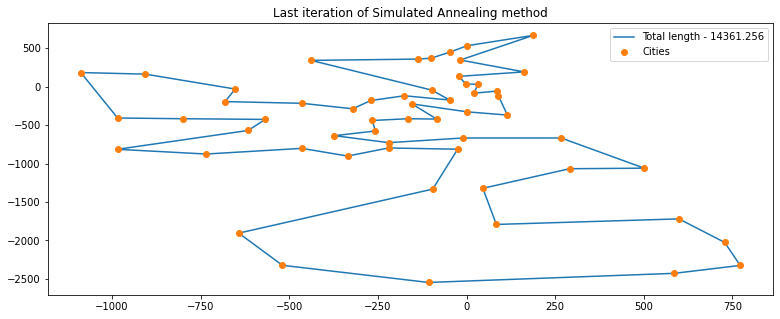

In [200]:
plt.figure(figsize=(13, 5))
plt.plot(cities_coords[close_loop(optim_path), 0], cities_coords[close_loop(optim_path), 1],
         label=f"Total length - {round(calculate_path_length(optim_path), 3)}")
plt.plot(cities_coords[:, 0], cities_coords[:, 1], 'o', label="Cities")
plt.title("Last iteration of Simulated Annealing method")
plt.legend()
plt.show()